In [1]:
# Daten einlesen

%matplotlib inline
import pymssql
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib

password = "Masterprojekt"
conn = pymssql.connect("pcs.f4.htw-berlin.de",
                       "Masterprojekt", password, "PraediktiveAnalysenTest")
cursor = conn.cursor()

df = pd.read_sql('SELECT * FROM Maschinendaten_20181122', conn)
conn.close()

# Sortierung umkehren
df_s = df.sort_values('ID', ascending = False)

# Datensätze filtern nach ... und in neuer Variable speichern df_f f=gefiltert
# ... ungeplanten Stillständen (Zufallsfehler)
df_f = df_s.query('FehlerID != "A000"')
df_f = df_s.query('FehlerID != "A001"')
df_f = df_s.query('FehlerID != "A002"')
df_f = df_s.query('FehlerID != "A003"')
df_f = df_s.query('FehlerID != "A004"')

# FehlerID durchsuchen und Zähler anlegen, der angibt wie lang es bis zu nächsten Ausfall dauert
x = []
y = 0
fail = df_s['FehlerID']
for row in fail:
    if row == "x000":
        y += 1
        x.append(y)
    else:
        y = 0
        x.append(y)
        
# "Ausfallentfernung" an df_s anhängen
df_s['NaechsterAusfall']=x


In [ ]:
df_s.head(5)

In [2]:
df_x = df_s
df_x = df_x.query('Leistungsaufnahme > 19')
df_x = df_x.query('NaechsterAusfall < 50')
df_x = df_x.query('Temperatur > 99')
df_x.pop('Produktionsprogramm')
df_x.pop('SollMenge')
df_x.pop('IstMenge')
df_x.pop('Ausschuss')
df_x.pop('Machine_ID')
df_x.pop('Maschine')
df_x.pop('Datum')
df_x.pop('Uhrzeit')
df_x.pop('ID')

df_x.head()

,Timestamp,Drehzahl,Leistungsaufnahme,Vibration,Lautstaerke,Temperatur,FehlerID,NaechsterAusfall
134501,2018-02-16 16:51:00,99.0,19.034,0.030,74.862,102.7,x000,1
134499,2018-02-16 16:50:00,97.0,19.106,-0.130,75.048,101.8,x000,3
134341,2018-02-16 15:31:00,97.0,19.769,0.021,75.053,201.2,x000,1
134340,2018-02-16 15:30:30,99.0,19.927,0.021,75.092,199.6,x000,2
134339,2018-02-16 15:30:00,96.0,19.990,0.084,75.154,199.2,x000,3


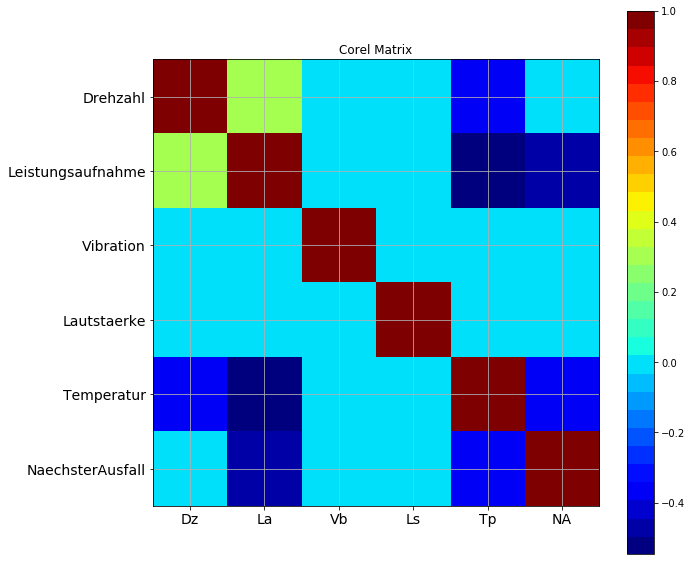

In [3]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
plt.title('Corel Matrix')
labels=['','Drehzahl','Leistungsaufnahme','Vibration','Lautstaerke','Temperatur','NaechsterAusfall']
labels_2=['','Dz','La','Vb','Ls','Tp','NA']
ax1.set_xticklabels(labels_2,fontsize=14)
ax1.set_yticklabels(labels,fontsize=14)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df_x.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.show()